In [1]:
import sys
sys.path.insert(0, '/home/misa/git_repositories/APDFT/prototyping/apdft-ofdft-cpmd/')

from profess_calculator import PROFESS_CPMD
import profess_io as pio
from cpmd import initialize_atoms
from ase.md.verlet import VelocityVerlet
from ase import units
import os
import numpy as np
from matplotlib import pyplot as plt

from ase import Atoms
from ase.io.trajectory import Trajectory

import pixiedust

Pixiedust database opened successfully


In [2]:
# initialize atoms object from PROFESS files
pos_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/ion.restart_file'
vel_file = '/home/misa/projects/APDFT-CPMD/data/BOMD/ase_NVE/Si8_hc/vel.restart_file'
atoms = initialize_atoms(pos_file, vel_file, pos_type='CART')

In [3]:
# set parameters for PROFESS calculation
profess_path = '/home/misa/software/PROFESS-1/PROFESS' # on avl24
#profess_path = '/home/misa/opt/PROFESS-1/PROFESS' # on avl51
log = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/Si8_debug.log'
traj_path = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/Si8_debug.traj'
run_dir = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8'
ini_den = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/initial_data/ase_nve.den'
ini_ion = '/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/initial_data/ase_nve.ion'
inpt_name = 'Si8_debug'
pp_names = ['si.lda.recpot']

mu = 100
dt = 0.01 # time interval in fs
t = 50 # total time in fs
steps = int(t/dt)
# make empty calculator
calc = PROFESS_CPMD()
# pass calculator to atoms object
atoms.calc = calc
# initialize calc object with correct parameters
atoms.calc.initialize(atoms, dt, ini_den, ini_ion, inpt_name, mu, 'CART', pp_names, profess_path, run_dir)

In [4]:
steps

5000

In [5]:
#%%pixie_debugger
# remove old logfile
try:
    os.remove(log)
except FileNotFoundError:
    print('Already deleted')

dyn = VelocityVerlet(atoms, dt*units.fs, logfile=log)
traj = Trajectory(traj_path, 'w', dyn.atoms)
dyn.attach(traj.write, interval=10)

dyn.run(steps)
traj.close()

In [6]:
log = np.loadtxt('/home/misa/projects/APDFT-CPMD/data/CPMD/debug_Si8/Si8_debug.log', skiprows=1)

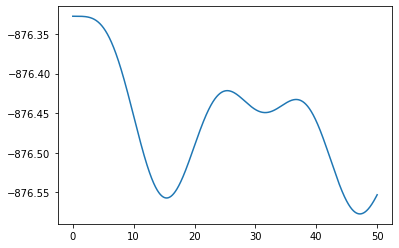

In [8]:
plt.plot(log[:,0]*1000, log[:,1])

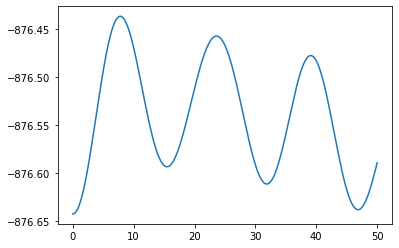

In [9]:
plt.plot(log[:,0]*1000, log[:,2])

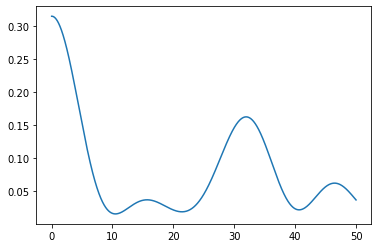

In [10]:
plt.plot(log[:,0]*1000, log[:,3])

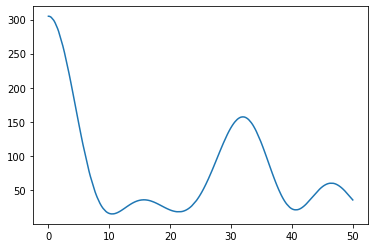

In [11]:
plt.plot(log[:,0]*1000, log[:,4])